In [1]:
import pandas as pd
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import random
import tensorflow as tf

from numpy import array
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
#memanggil dataset
df = pd.read_csv('label otomatis.csv') #dipilih hanya kolom content
data = df[['text']]
data

,text
0,it's a land grab
1,Can Palestine not obey the kaffah way in Islam...
2,"If Palestine is Rohingya, it's more of a polit..."
3,"Islamic terrorists are the main new symptom, l..."
4,At least I'm angry because you're moderate. I ...
...,...
1417,israel-palestine conflict take care of them wh...
1418,This conflict between Israel and Palestine is ...
1419,permanent ceasefire target
1420,It's not a problem not supporting Palestine or...


In [4]:
#check NaN
data.isna().sum()

text    0
dtype: int64

In [5]:
#remove NaN
df=data.dropna()
df

,text
0,it's a land grab
1,Can Palestine not obey the kaffah way in Islam...
2,"If Palestine is Rohingya, it's more of a polit..."
3,"Islamic terrorists are the main new symptom, l..."
4,At least I'm angry because you're moderate. I ...
...,...
1417,israel-palestine conflict take care of them wh...
1418,This conflict between Israel and Palestine is ...
1419,permanent ceasefire target
1420,It's not a problem not supporting Palestine or...


In [6]:
#labelling the dataset dengan polarity
df['label'] = ''
for i,x in df.text.iteritems():
    label = TextBlob(x)
    df['label'][i] = label.sentiment.polarity
    print("Index: ", i ,  "label" , label.sentiment.polarity)

Index:  0 label 0.0
Index:  1 label 0.35
Index:  2 label 0.16666666666666666
Index:  3 label 0.1505050505050505
Index:  4 label -0.26666666666666666
Index:  5 label 0.11500000000000002
Index:  6 label 0.225
Index:  7 label -0.3
Index:  8 label 0.0
Index:  9 label 0.2
Index:  10 label 0.5
Index:  11 label 0.0
Index:  12 label 0.0
Index:  13 label -0.2
Index:  14 label 0.0
Index:  15 label 0.4
Index:  16 label 0.0
Index:  17 label -0.16666666666666666
Index:  18 label 0.6
Index:  19 label 0.10714285714285714
Index:  20 label 0.25
Index:  21 label 0.07500000000000001
Index:  22 label 0.0
Index:  23 label -0.3
Index:  24 label 0.0
Index:  25 label -0.021428571428571422
Index:  26 label 0.0
Index:  27 label 0.25
Index:  28 label 0.2816666666666667
Index:  29 label -0.5
Index:  30 label -0.5
Index:  31 label 0.0
Index:  32 label 0.5
Index:  33 label 0.06818181818181818
Index:  34 label -0.134375
Index:  35 label 0.0
Index:  36 label 0.4
Index:  37 label 0.0
Index:  38 label 0.033333333333333

Index:  293 label 0.0
Index:  294 label 0.05000000000000002
Index:  295 label 0.19714285714285712
Index:  296 label -0.020833333333333336
Index:  297 label 0.0
Index:  298 label 0.05
Index:  299 label 0.35000000000000003
Index:  300 label 0.0
Index:  301 label 0.04206349206349206
Index:  302 label 0.06517857142857142
Index:  303 label 0.0
Index:  304 label 0.16517857142857142
Index:  305 label 0.05601010101010101
Index:  306 label 0.09441558441558441
Index:  307 label -0.1111111111111111
Index:  308 label -0.30000000000000004
Index:  309 label -0.19270833333333331
Index:  310 label 0.0
Index:  311 label 0.0
Index:  312 label -0.05
Index:  313 label 0.2375
Index:  314 label 0.0125
Index:  315 label 0.0
Index:  316 label 0.26190476190476186
Index:  317 label 0.5
Index:  318 label -0.03125
Index:  319 label 0.26666666666666666
Index:  320 label 0.3305194805194805
Index:  321 label -0.21428571428571427
Index:  322 label 0.0
Index:  323 label 0.25416666666666665
Index:  324 label 0.0
Index:

Index:  596 label 0.0
Index:  597 label -0.05714285714285716
Index:  598 label -0.2375
Index:  599 label -0.5
Index:  600 label -0.01785714285714285
Index:  601 label 0.0
Index:  602 label -0.5
Index:  603 label 0.25
Index:  604 label 0.2619047619047619
Index:  605 label -0.10000000000000002
Index:  606 label 0.1075892857142857
Index:  607 label -0.1777272727272727
Index:  608 label -0.1
Index:  609 label -0.09166666666666667
Index:  610 label 0.1
Index:  611 label 0.0
Index:  612 label -0.11666666666666665
Index:  613 label 0.0
Index:  614 label 0.0
Index:  615 label 0.35
Index:  616 label 0.06666666666666667
Index:  617 label 0.08625000000000001
Index:  618 label -0.05555555555555556
Index:  619 label 0.0
Index:  620 label -0.16666666666666666
Index:  621 label 0.24833333333333335
Index:  622 label 0.375
Index:  623 label -0.1
Index:  624 label 0.4666666666666666
Index:  625 label 0.3
Index:  626 label -0.05
Index:  627 label 0.0
Index:  628 label 0.05
Index:  629 label 0.06818181818

Index:  919 label 0.3
Index:  920 label 0.4
Index:  921 label -0.21875
Index:  922 label 0.0
Index:  923 label 0.04166666666666667
Index:  924 label 0.4
Index:  925 label 0.07976190476190476
Index:  926 label 0.31111111111111106
Index:  927 label 0.0
Index:  928 label 0.5
Index:  929 label -0.18333333333333332
Index:  930 label 0.0
Index:  931 label -1.0
Index:  932 label 0.0
Index:  933 label 0.0975
Index:  934 label -0.01249999999999999
Index:  935 label 0.0
Index:  936 label 0.0
Index:  937 label 0.0
Index:  938 label 0.06818181818181818
Index:  939 label 0.0
Index:  940 label 0.0
Index:  941 label -0.03125
Index:  942 label -0.3
Index:  943 label 0.15
Index:  944 label 0.25
Index:  945 label 0.05
Index:  946 label 0.0
Index:  947 label 0.0
Index:  948 label 0.0
Index:  949 label 0.0
Index:  950 label 0.125
Index:  951 label 0.0
Index:  952 label 0.19999999999999998
Index:  953 label 0.4
Index:  954 label 0.0
Index:  955 label -0.007142857142857145
Index:  956 label 0.16499999999999

Index:  1228 label 0.03285714285714285
Index:  1229 label 0.475
Index:  1230 label 0.0
Index:  1231 label -0.19
Index:  1232 label 0.13636363636363635
Index:  1233 label 0.4
Index:  1234 label 0.0
Index:  1235 label 0.8
Index:  1236 label -0.07833333333333332
Index:  1237 label 0.26666666666666666
Index:  1238 label 0.0
Index:  1239 label -0.15454545454545457
Index:  1240 label -0.09999999999999999
Index:  1241 label 0.0
Index:  1242 label 0.4333333333333333
Index:  1243 label 0.19499999999999998
Index:  1244 label -0.013888888888888892
Index:  1245 label 0.08333333333333333
Index:  1246 label -0.2
Index:  1247 label 0.04125000000000001
Index:  1248 label 0.0
Index:  1249 label 0.0
Index:  1250 label -0.03968253968253969
Index:  1251 label -0.33749999999999997
Index:  1252 label -0.7999999999999999
Index:  1253 label 0.06666666666666667
Index:  1254 label 0.16666666666666666
Index:  1255 label 0.16666666666666666
Index:  1256 label -0.033333333333333326
Index:  1257 label 0.0
Index:  1

In [7]:
#mendefinisikan hasil polarity tiap-tiap baris apakah berlabel positif negatif maupun netral
def polarity_to_label(x):
    if(x >= -1 and x < 0):
        return 'neg'
    if(x == 0):
        return 'neutral'
    if(x > 0 and x <= 1):
        return 'pos'
df.label = df.label.apply(polarity_to_label)

In [8]:
df

,text,label
0,it's a land grab,neutral
1,Can Palestine not obey the kaffah way in Islam...,pos
2,"If Palestine is Rohingya, it's more of a polit...",pos
3,"Islamic terrorists are the main new symptom, l...",pos
4,At least I'm angry because you're moderate. I ...,neg
...,...,...
1417,israel-palestine conflict take care of them wh...,pos
1418,This conflict between Israel and Palestine is ...,pos
1419,permanent ceasefire target,neutral
1420,It's not a problem not supporting Palestine or...,neg


In [9]:
#jumlah value masing-masing kelas label
df.label.value_counts()

pos        672
neutral    391
neg        359
Name: label, dtype: int64

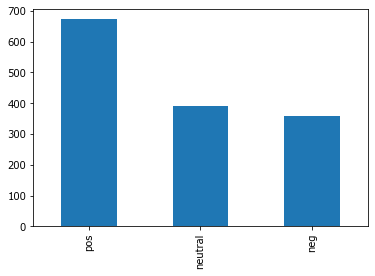

In [10]:
df['label'].value_counts().plot(kind='bar');

In [11]:
df.to_csv('hasil labelling otomatis.csv',encoding='utf8', index=False)
df

,text,label
0,it's a land grab,neutral
1,Can Palestine not obey the kaffah way in Islam...,pos
2,"If Palestine is Rohingya, it's more of a polit...",pos
3,"Islamic terrorists are the main new symptom, l...",pos
4,At least I'm angry because you're moderate. I ...,neg
...,...,...
1417,israel-palestine conflict take care of them wh...,pos
1418,This conflict between Israel and Palestine is ...,pos
1419,permanent ceasefire target,neutral
1420,It's not a problem not supporting Palestine or...,neg
